In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames[:5]:
#         print(os.path.join(dirname, filename))

# /kaggle/input/fast-food-classification-dataset/Fast Food Data/Training Data/Pizza/Pizza-Train (907).jpeg

# import datasets use keras 

In [3]:
import glob 
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import numpy as np
import pandas as pd 



In [4]:
train_data_dir ='/kaggle/input/fast-food-classification-dataset/Fast Food Data/Training Data' 
val_data_dir = '/kaggle/input/fast-food-classification-dataset/Fast Food Data/Validation Data'

In [5]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    )
val_datagen = ImageDataGenerator(
    rescale=1./255,
)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (180,180),
    batch_size=16,
    # class_mode default value is clasification
)
val_generator = train_datagen.flow_from_directory(
    val_data_dir,
    target_size = (180,180),
    batch_size=16,
    
)

Found 7500 images belonging to 5 classes.
Found 2500 images belonging to 5 classes.


In [6]:
labels = ['Burger','Donut','Hot Dog','Pizza','Sandwich']

# build the model 

In [14]:
from tensorflow.keras.applications.vgg16 import VGG16 
model = VGG16(weights='imagenet',include_top=False)

In [16]:
from keras.layers import Dense, GlobalAveragePooling2D
result = model.output 
result = GlobalAveragePooling2D()(result)
result = Dense(512,activation='relu')(result)
predictions = Dense(5,activation='sigmoid')(result)

from tensorflow.keras.models import Model
vgg_model = Model(inputs=model.input,outputs=predictions)

In [17]:
import tensorflow as tf 
vgg_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

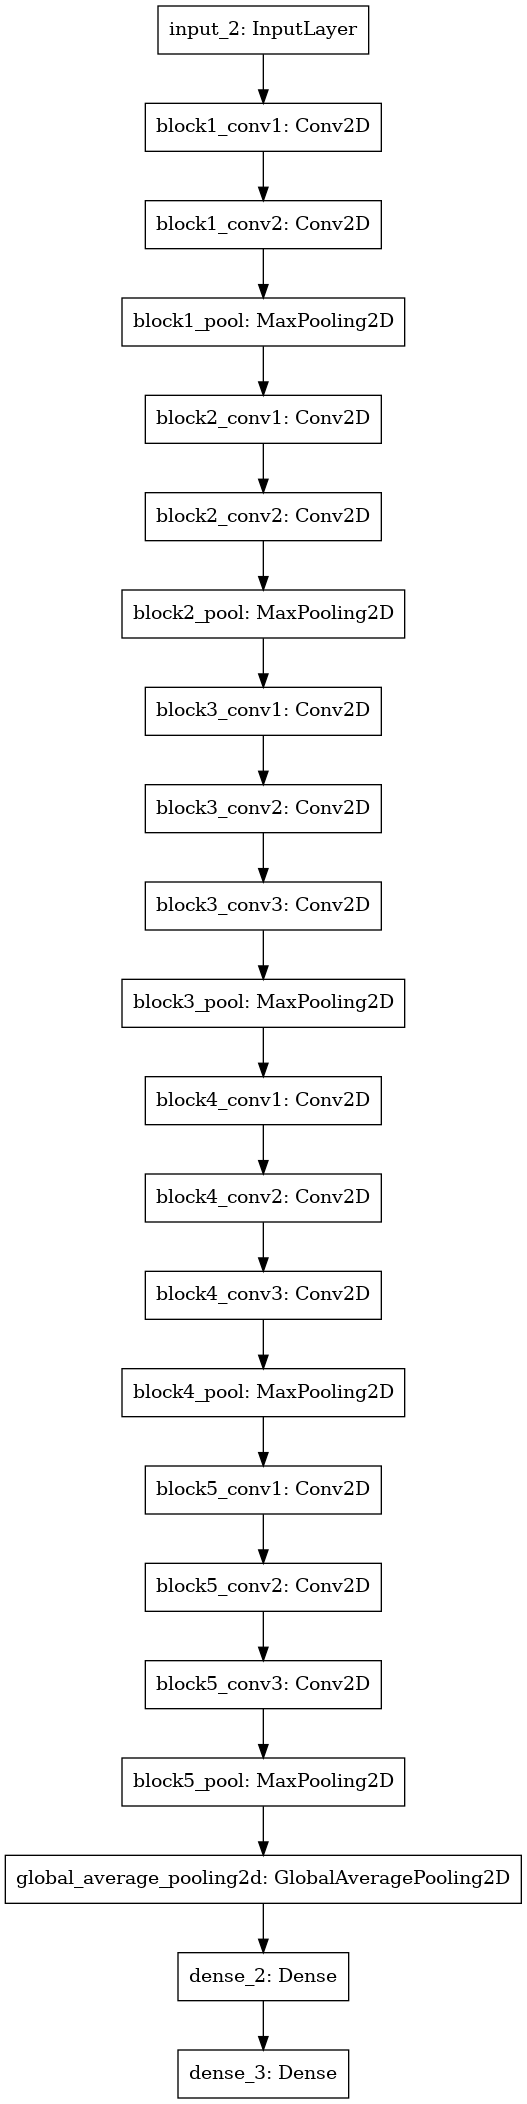

In [20]:
from tensorflow.keras.utils import plot_model
plot_model(
    vgg_model,to_file = 'vgg_model.png'
)

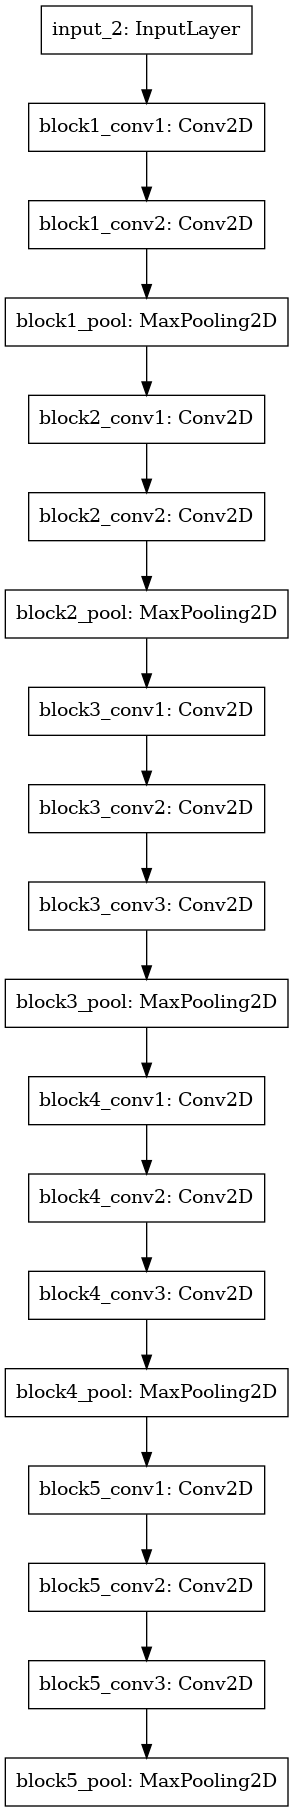

In [21]:

plot_model(
    model,to_file = 'only_vgg_model.png'
)

In [18]:
with tf.device("/device:GPU:0"):
    
    history = vgg_model.fit_generator(
        train_generator,
        epochs=10,
        shuffle=True,
        verbose=1,
        validation_data=val_generator)

Epoch 1/10
 55/469 [==>...........................] - ETA: 1:08:33 - loss: 1148971392.0000 - accuracy: 0.2045

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Pretrained'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Pretrained'], loc='upper left')
plt.show()